# Bank Customer Churn Prediction

Given a dataset consisiting of Bank Customer information, building a predictor which will tell us if a customer will exit the bank or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow import keras

### Data Preprocessing

#### Load Dataset

In [2]:
df = pd.read_csv("BankTurnoverDataset.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

This data set has 10,000 datapoints and 14 attributes/features/columns.

In this dataset, we have to consider which of the factors may play a role in someone exiting a bank. To do that we must look at all the column and infer whether it will matter in predicting a new customer churn or not. The information about a customer is entailed in columns 0 through 12 (RowNumber-EstimatedSalary), while the output (whether the customer churned or not) is stored in the 13th row (Exited).

In [5]:
#Inspecting Null Values
null_values = df.isnull().sum()

print(null_values)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


This dataset is clean,The is no Null value present in any of the columns. 


Here we can see that the column 'RowNumber','CustomerId' and 'Surname' is not important for our current analysis. So we can drop those coulmns. 

In [6]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Here we can see that all the columns/attributes are in their desired datatypes. For example all the numeric data(CreditScore, Age, EstimatedSalary) are in integer / float types. On the other hand, Geography/Gender are in object type

### Exploratory Data Analysis


In [10]:
# divide the dataset into 
df_churn_yes = df[df.Exited == 1]
df_churn_no = df[df.Exited == 0]

In [11]:
print("Churn = Yes:", df_churn_yes.shape[0])
print("Churn = No:",df_churn_no.shape[0])

Churn = Yes: 2037
Churn = No: 7963


1. Count: Customer Retention VS Churn

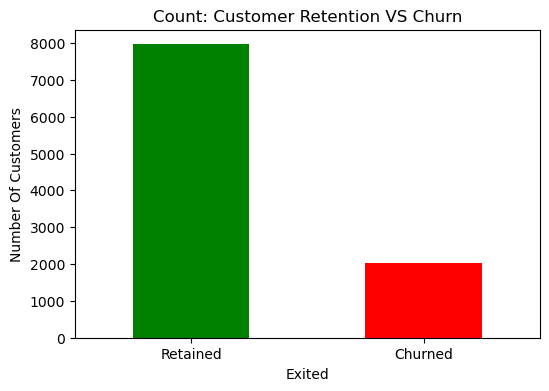

In [12]:
# Count the number of customers who stayed and left
exited_counts = df['Exited'].value_counts()

# Plotting the histogram
plt.figure(figsize=(6, 4))
exited_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Count: Customer Retention VS Churn')
plt.xlabel('Exited')
plt.ylabel('Number Of Customers')
plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)
plt.show()

2. Tenure (No of years people spend in this service) distribution of customers (Retained vs Churned)

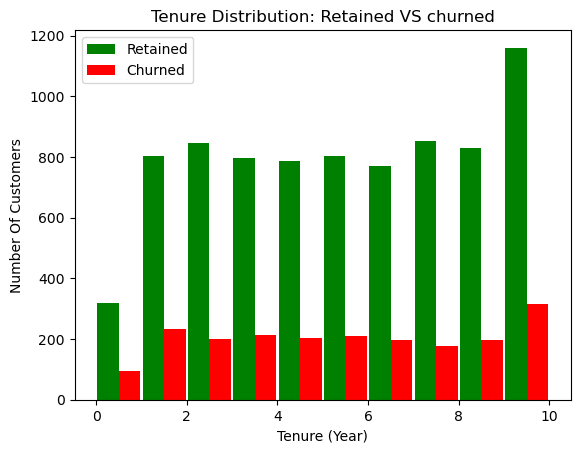

In [13]:
tenure_churn_no = df[df.Exited==0].Tenure               
tenure_churn_yes = df[df.Exited==1].Tenure               

plt.xlabel("Tenure (Year)")
plt.ylabel("Number Of Customers")
plt.title("Tenure Distribution: Retained VS churned")

plt.hist([tenure_churn_no, tenure_churn_yes], rwidth=0.95, color=['green','red'],label=['Retained','Churned'])
plt.legend()

3. Gender distribution of customers (Retained vs Churned)

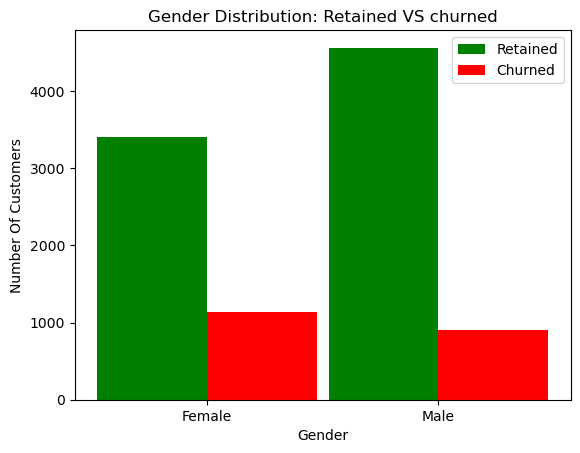

In [14]:
Gender_churn_no = df[df.Exited==0].Gender               
Gender_churn_yes = df[df.Exited==1].Gender               

plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.title("Gender Distribution: Retained VS churned")
plt.xticks([0.25, 0.75], ['Female', 'Male'])
plt.hist([Gender_churn_no, Gender_churn_yes], rwidth=0.95, color=['green','red'],label=['Retained','Churned'], orientation='vertical', bins=2)
plt.legend()

4. Credit Score Distribution

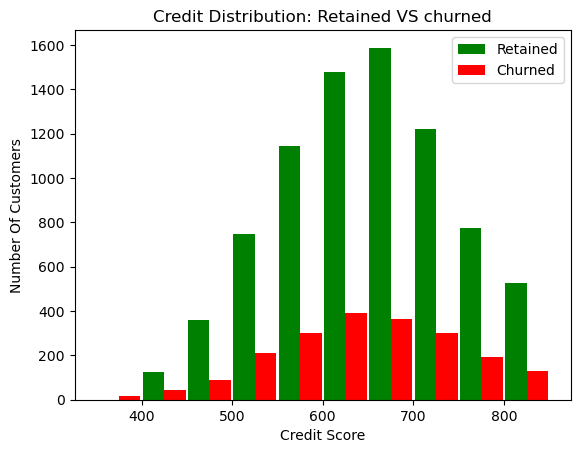

In [15]:
CreditScore_churn_no = df[df.Exited==0].CreditScore               
CreditScore_churn_yes = df[df.Exited==1].CreditScore      

plt.xlabel("Credit Score")
plt.ylabel("Number Of Customers")
plt.title("Credit Distribution: Retained VS churned")

plt.hist([CreditScore_churn_no, CreditScore_churn_yes], rwidth=0.95, color=['green','red'],label=['Retained','Churned'])
plt.legend()

5. Geography Distribution

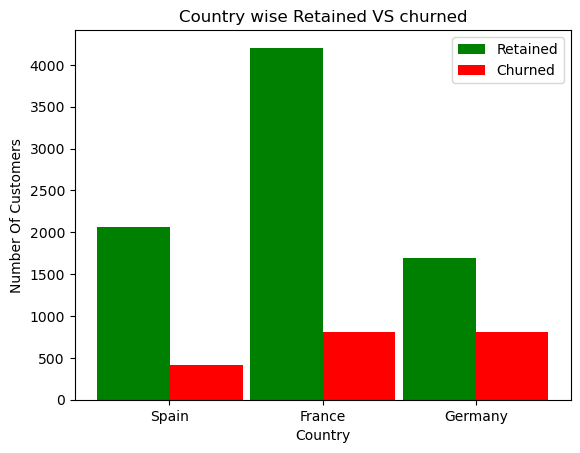

In [16]:
Geography_churn_no = df[df.Exited==0].Geography               
Geography_churn_yes = df[df.Exited==1].Geography      

plt.xlabel("Country")
plt.ylabel("Number Of Customers")
plt.title("Country wise Retained VS churned")
plt.xticks([0.33, 1.0, 1.67], ['Spain','France', 'Germany'])
plt.hist([Geography_churn_no, Geography_churn_yes], rwidth=0.95, color=['green','red'],label=['Retained','Churned'], orientation='vertical', bins=3)
plt.legend()

#### One hot encoding to the categorical variables:

In [17]:
df = pd.get_dummies(data=df, columns=['Geography'], dtype='uint8')
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [18]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
df.dtypes

CreditScore            int64
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [20]:
# Encode Gender (0 and 1)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
#df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [21]:
# Scale Columns
columns_to_scale = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [22]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

#### Train Test Split:

In [23]:
X = df.drop('Exited', axis = 'columns')
y = df['Exited']

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [25]:
X_train.shape

(8000, 12)

In [26]:
X_test.shape

(2000, 12)

In [27]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


#### Model Building:  Atrificial Neural Networks(ANN) in tensorflow/keras

In [28]:
model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history =  model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)


Epoch 1/200


225/225 - 1s - loss: 0.6157 - accuracy: 0.6632 - val_loss: 0.4860 - val_accuracy: 0.8062 - 1s/epoch - 7ms/step
Epoch 2/200
225/225 - 0s - loss: 0.5028 - accuracy: 0.7939 - val_loss: 0.4652 - val_accuracy: 0.8062 - 280ms/epoch - 1ms/step
Epoch 3/200
225/225 - 0s - loss: 0.4898 - accuracy: 0.7946 - val_loss: 0.4518 - val_accuracy: 0.8062 - 274ms/epoch - 1ms/step
Epoch 4/200
225/225 - 0s - loss: 0.4811 - accuracy: 0.7950 - val_loss: 0.4460 - val_accuracy: 0.8062 - 277ms/epoch - 1ms/step
Epoch 5/200
225/225 - 0s - loss: 0.4753 - accuracy: 0.7946 - val_loss: 0.4420 - val_accuracy: 0.8062 - 279ms/epoch - 1ms/step
Epoch 6/200
225/225 - 0s - loss: 0.4626 - accuracy: 0.7947 - val_loss: 0.4377 - val_accuracy: 0.8062 - 280ms/epoch - 1ms/step
Epoch 7/200
225/225 - 0s - loss: 0.4570 - accuracy: 0.7949 - val_loss: 0.4328 - val_accuracy: 0.8062 - 280ms/epoch - 1ms/step
Epoch 8/200
225/225 - 0s - loss: 0.4530 - accuracy: 0.7950 - val_loss: 0.4236 - val_accuracy: 0.8062 - 270ms/epoch - 1

225/225 - 0s - loss: 0.3737 - accuracy: 0.8393 - val_loss: 0.3279 - val_accuracy: 0.8600 - 285ms/epoch - 1ms/step
Epoch 61/200
225/225 - 0s - loss: 0.3794 - accuracy: 0.8347 - val_loss: 0.3280 - val_accuracy: 0.8625 - 283ms/epoch - 1ms/step
Epoch 62/200
225/225 - 0s - loss: 0.3775 - accuracy: 0.8383 - val_loss: 0.3293 - val_accuracy: 0.8600 - 292ms/epoch - 1ms/step
Epoch 63/200
225/225 - 0s - loss: 0.3754 - accuracy: 0.8363 - val_loss: 0.3281 - val_accuracy: 0.8625 - 281ms/epoch - 1ms/step
Epoch 64/200
225/225 - 0s - loss: 0.3769 - accuracy: 0.8381 - val_loss: 0.3256 - val_accuracy: 0.8625 - 288ms/epoch - 1ms/step
Epoch 65/200
225/225 - 0s - loss: 0.3726 - accuracy: 0.8406 - val_loss: 0.3279 - val_accuracy: 0.8562 - 311ms/epoch - 1ms/step
Epoch 66/200
225/225 - 0s - loss: 0.3772 - accuracy: 0.8374 - val_loss: 0.3299 - val_accuracy: 0.8600 - 298ms/epoch - 1ms/step
Epoch 67/200
225/225 - 0s - loss: 0.3739 - accuracy: 0.8396 - val_loss: 0.3265 - val_accuracy: 0.8637 - 285ms/epoch - 1ms/st

Epoch 125/200
225/225 - 0s - loss: 0.3692 - accuracy: 0.8419 - val_loss: 0.3238 - val_accuracy: 0.8687 - 285ms/epoch - 1ms/step
Epoch 126/200
225/225 - 0s - loss: 0.3673 - accuracy: 0.8411 - val_loss: 0.3221 - val_accuracy: 0.8725 - 285ms/epoch - 1ms/step
Epoch 127/200
225/225 - 0s - loss: 0.3685 - accuracy: 0.8399 - val_loss: 0.3216 - val_accuracy: 0.8712 - 272ms/epoch - 1ms/step
Epoch 128/200
225/225 - 0s - loss: 0.3704 - accuracy: 0.8397 - val_loss: 0.3209 - val_accuracy: 0.8725 - 280ms/epoch - 1ms/step
Epoch 129/200
225/225 - 0s - loss: 0.3711 - accuracy: 0.8365 - val_loss: 0.3230 - val_accuracy: 0.8737 - 279ms/epoch - 1ms/step
Epoch 130/200
225/225 - 0s - loss: 0.3711 - accuracy: 0.8382 - val_loss: 0.3211 - val_accuracy: 0.8750 - 290ms/epoch - 1ms/step
Epoch 131/200
225/225 - 0s - loss: 0.3716 - accuracy: 0.8389 - val_loss: 0.3227 - val_accuracy: 0.8712 - 270ms/epoch - 1ms/step
Epoch 132/200
225/225 - 0s - loss: 0.3688 - accuracy: 0.8428 - val_loss: 0.3205 - val_accuracy: 0.8737 -

225/225 - 0s - loss: 0.3611 - accuracy: 0.8471 - val_loss: 0.3121 - val_accuracy: 0.8750 - 285ms/epoch - 1ms/step
Epoch 190/200
225/225 - 0s - loss: 0.3630 - accuracy: 0.8425 - val_loss: 0.3145 - val_accuracy: 0.8763 - 337ms/epoch - 1ms/step
Epoch 191/200
225/225 - 0s - loss: 0.3609 - accuracy: 0.8476 - val_loss: 0.3129 - val_accuracy: 0.8763 - 324ms/epoch - 1ms/step
Epoch 192/200
225/225 - 0s - loss: 0.3611 - accuracy: 0.8450 - val_loss: 0.3117 - val_accuracy: 0.8763 - 340ms/epoch - 2ms/step
Epoch 193/200
225/225 - 0s - loss: 0.3617 - accuracy: 0.8447 - val_loss: 0.3124 - val_accuracy: 0.8750 - 353ms/epoch - 2ms/step
Epoch 194/200
225/225 - 0s - loss: 0.3633 - accuracy: 0.8436 - val_loss: 0.3135 - val_accuracy: 0.8750 - 323ms/epoch - 1ms/step
Epoch 195/200
225/225 - 0s - loss: 0.3663 - accuracy: 0.8439 - val_loss: 0.3131 - val_accuracy: 0.8775 - 340ms/epoch - 2ms/step
Epoch 196/200
225/225 - 0s - loss: 0.3635 - accuracy: 0.8454 - val_loss: 0.3120 - val_accuracy: 0.8775 - 345ms/epoch -

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


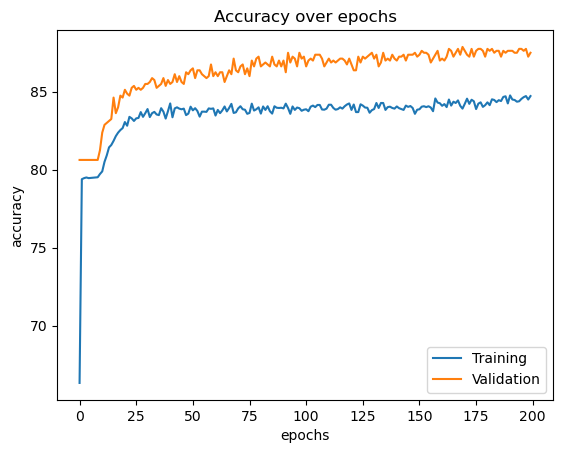

In [31]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy over epochs')
plt.show()

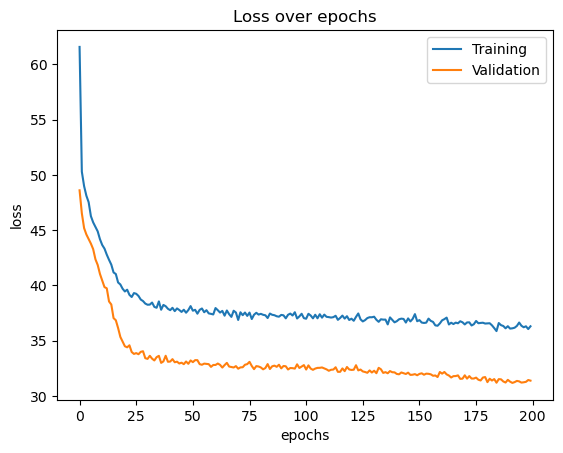

In [32]:
plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training', 'Validation'])
plt.title('Loss over epochs')
plt.show()

In [33]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8510


[0.3561767637729645, 0.8510000109672546]

In [34]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.03926678],
       [0.0670605 ],
       [0.08221536],
       [0.07661472],
       [0.09028796]], dtype=float32)

In [35]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.78      0.37      0.50       405

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1552   43]
 [ 255  150]]


Text(70.72222222222221, 0.5, 'Truth')

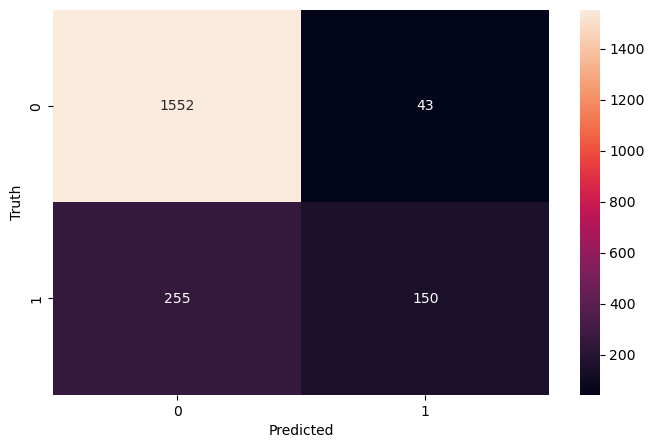

In [41]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')